In [36]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [45]:

file_path1=Path("Data/owid-co2-data.csv")


In [46]:
file_one_df1 = pd.read_csv(file_path1, encoding="ISO-8859-1")
file_one_df1.head(-1)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50592,Zimbabwe,2016,ZWE,14452705.0,2.096179e+10,0.461,0.032,10.533,-1.722,-14.047,...,NaN,0.115,0.001,0.001,0.002,0.0,115.92,28.53,1.404,13.330
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795


In [103]:
#creating a new dataframe starting from year 2000 to onward
cleaned_data1=file_one_df1.loc[file_one_df1['year'] >= 2000]
cleaned_data1.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
150,Afghanistan,2000,AFG,19542986.0,1.128379e+10,0.010,0.001,1.047,-0.045,-4.078,...,NaN,0.080,0.0,0.0,0.001,0.0,11.50,13.89,NaN,NaN
151,Afghanistan,2001,AFG,19688634.0,1.102127e+10,0.007,0.000,1.069,0.022,2.098,...,NaN,0.079,0.0,0.0,0.001,0.0,12.37,12.25,NaN,NaN
152,Afghanistan,2002,AFG,21000258.0,1.880487e+10,0.011,0.001,1.341,0.272,25.432,...,NaN,0.078,0.0,0.0,0.001,0.0,15.01,14.89,NaN,NaN
153,Afghanistan,2003,AFG,22645136.0,2.107434e+10,0.010,0.000,1.560,0.219,16.302,...,NaN,0.078,0.0,0.0,0.001,0.0,15.65,15.53,NaN,NaN
154,Afghanistan,2004,AFG,23553554.0,2.233257e+10,0.010,0.000,1.237,-0.322,-20.669,...,NaN,0.077,0.0,0.0,0.001,0.0,15.44,15.31,NaN,NaN


In [104]:
#creating group of year and calculating every variable's average
group_by_year=cleaned_data1.groupby(["year", "country", "iso_code"])
emission_by_factors=group_by_year.mean()
emission_by_factors



population           gdp  cement_co2  \
year country           iso_code                                         
2000 Afghanistan       AFG       19542986.0  1.128379e+10       0.010   
     Aland Islands     ALA              NaN           NaN         NaN   
     Albania           ALB        3182027.0  1.521426e+10       0.094   
     Algeria           DZA       30774624.0  2.085541e+11       3.789   
     American Samoa    ASM          58251.0           NaN         NaN   
...                                     ...           ...         ...   
2021 Wallis and Futuna WLF          11654.0           NaN       0.000   
     Western Sahara    ESH         565590.0           NaN         NaN   
     Yemen             YEM       32981644.0           NaN       0.664   
     Zambia            ZMB       19473132.0           NaN       0.961   
     Zimbabwe          ZWE       15993525.0           NaN       0.570   

                                 cement_co2_per_capita     co2  \
year country           iso_code                                  
2000 Afghanistan       AFG                       0.001   1.047   
     Aland Islands     ALA                         NaN     NaN   
     Albania           ALB                       0.029   3.025   
     Algeria           DZA                       0.123  82.221   
     American Samoa    ASM                         NaN     NaN   
...                                                ...     ...   
2021 Wallis and Futuna WLF                       0.000   0.028   
     Western Sahara    ESH                         NaN     NaN   
     Yemen             YEM                       0.020  12.477   
     Zambia            ZMB                       0.049   7.676   
     Zimbabwe          ZWE                       0.036  11.296   

                                 co2_growth_abs  co2_growth_prct  \
year country           iso_code                                    
2000 Afghanistan       AFG               -0.045           -4.078   
     Aland Islands     ALA                  NaN              NaN   
     Albania           ALB                0.039            1.297   
     Algeria           DZA               -9.447          -10.306   
     American Samoa    ASM                  NaN              NaN   
...                                         ...              ...   
2021 Wallis and Futuna WLF                0.001            2.767   
     Western Sahara    ESH                  NaN              NaN   
     Yemen             YEM                0.336            2.771   
     Zambia            ZMB                0.396            5.432   
     Zimbabwe          ZWE                0.688            6.488   

                                 co2_including_luc  \
year country           iso_code                      
2000 Afghanistan       AFG                   0.864   
     Aland Islands     ALA                     NaN   
     Albania           ALB                   2.732   
     Algeria           DZA                  87.277   
     American Samoa    ASM                     NaN   
...                                            ...   
2021 Wallis and Futuna WLF                     NaN   
     Western Sahara    ESH                     NaN   
     Yemen             YEM                  10.938   
     Zambia            ZMB                  67.839   
     Zimbabwe          ZWE                  18.771   

                                 co2_including_luc_growth_abs  \
year country           iso_code                                 
2000 Afghanistan       AFG                             -0.154   
     Aland Islands     ALA                                NaN   
     Albania           ALB                              0.039   
     Algeria           DZA                             -7.579   
     American Samoa    ASM                                NaN   
...                                                       ...   
2021 Wallis and Futuna WLF                                NaN   
     Western Sahara    ESH                         

In [49]:
emissionbyfactors_df=pd.DataFrame(emission_by_factors)
emissionbyfactors_df.head()


population           gdp  cement_co2  \
year country        iso_code                                         
2000 Afghanistan    AFG       19542986.0  1.128379e+10       0.010   
     Aland Islands  ALA              NaN           NaN         NaN   
     Albania        ALB        3182027.0  1.521426e+10       0.094   
     Algeria        DZA       30774624.0  2.085541e+11       3.789   
     American Samoa ASM          58251.0           NaN         NaN   

                              cement_co2_per_capita     co2  co2_growth_abs  \
year country        iso_code                                                  
2000 Afghanistan    AFG                       0.001   1.047          -0.045   
     Aland Islands  ALA                         NaN     NaN             NaN   
     Albania        ALB                       0.029   3.025           0.039   
     Algeria        DZA                       0.123  82.221          -9.447   
     American Samoa ASM                         NaN     NaN             NaN   

                              co2_growth_prct  co2_including_luc  \
year country        iso_code                                       
2000 Afghanistan    AFG                -4.078              0.864   
     Aland Islands  ALA                   NaN                NaN   
     Albania        ALB                 1.297              2.732   
     Algeria        DZA               -10.306             87.277   
     American Samoa ASM                   NaN                NaN   

                              co2_including_luc_growth_abs  \
year country        iso_code                                 
2000 Afghanistan    AFG                             -0.154   
     Aland Islands  ALA                                NaN   
     Albania        ALB                              0.039   
     Algeria        DZA                             -7.579   
     American Samoa ASM                                NaN   

                              co2_including_luc_growth_prct  ...  \
year country        iso_code                                 ...   
2000 Afghanistan    AFG                             -15.165  ...   
     Aland Islands  ALA                                 NaN  ...   
     Albania        ALB                               1.438  ...   
     Algeria        DZA                              -7.990  ...   
     American Samoa ASM                                 NaN  ...   

                              share_global_other_co2  \
year country        iso_code                           
2000 Afghanistan    AFG                          NaN   
     Aland Islands  ALA                          NaN   
     Albania        ALB                          NaN   
     Algeria        DZA                          NaN   
     American Samoa ASM                          NaN   

                              share_of_temperature_change_from_ghg  \
year country        iso_code                                         
2000 Afghanistan    AFG                                      0.080   
     Aland Islands  ALA                                        NaN   
     Albania        ALB                                      0.031   
     Algeria        DZA                                      0.389   
     American Samoa ASM                                        NaN   

                              temperature_change_from_ch4  \
year country        iso_code                                
2000 Afghanistan    AFG                             0.000   
     Aland Islands  ALA                               NaN   
     Albania        ALB                             0.000   
     Algeria        DZA                             0.003   
     American Samoa ASM                               NaN   

                              temperature_change_from_co2  \
year country        iso_code                                
2000 Afghanistan    AFG                             0.000   
     Aland Islands  ALA                               NaN   
     Albania        ALB                 

In [106]:
# Creating a new dataframe of average emission Per year

average_of_co2_2010=cleaned_data1.loc[cleaned_data1['year']== 2010, 'co2'].mean()
average_of_co2_2011=cleaned_data1.loc[cleaned_data1['year']== 2011, 'co2'].mean()
average_of_co2_2012=cleaned_data1.loc[cleaned_data1['year']== 2012, 'co2'].mean()
average_of_co2_2013=cleaned_data1.loc[cleaned_data1['year']== 2013, 'co2'].mean()
average_of_co2_2014=cleaned_data1.loc[cleaned_data1['year']== 2014, 'co2'].mean()
average_of_co2_2015=cleaned_data1.loc[cleaned_data1['year']== 2015, 'co2'].mean()
average_of_co2_2016=cleaned_data1.loc[cleaned_data1['year']== 2016, 'co2'].mean()
average_of_co2_2017=cleaned_data1.loc[cleaned_data1['year']== 2017, 'co2'].mean()
average_of_co2_2018=cleaned_data1.loc[cleaned_data1['year']== 2018, 'co2'].mean()
average_of_co2_2019=cleaned_data1.loc[cleaned_data1['year']== 2019, 'co2'].mean()
average_of_co2_2020=cleaned_data1.loc[cleaned_data1['year']== 2020, 'co2'].mean()
average_of_co2_2021=cleaned_data1.loc[cleaned_data1['year']== 2021, 'co2'].mean()
average_score={'Year':['2010','2011',
                       '2012','2013','2014','2015','2016','2017',
                       '2018','2019','2020','2021'],
               "Average Co2":[ average_of_co2_2010, average_of_co2_2011,
                         average_of_co2_2012, average_of_co2_2013, average_of_co2_2014,
                         average_of_co2_2015, average_of_co2_2016, average_of_co2_2017,
                         average_of_co2_2018, average_of_co2_2019, average_of_co2_2020,
                         average_of_co2_2021
                          ]}
                
average_co2_df=pd.DataFrame(average_score)
average_co2_df.head(20)

,Year,Average Co2
0,2010,882.173653
1,2011,908.851379
2,2012,922.141411
3,2013,927.754246
4,2014,932.155234
5,2015,932.076879
6,2016,931.338839
7,2017,945.561452
8,2018,962.661738
9,2019,967.436964


<Axes: xlabel='Year'>

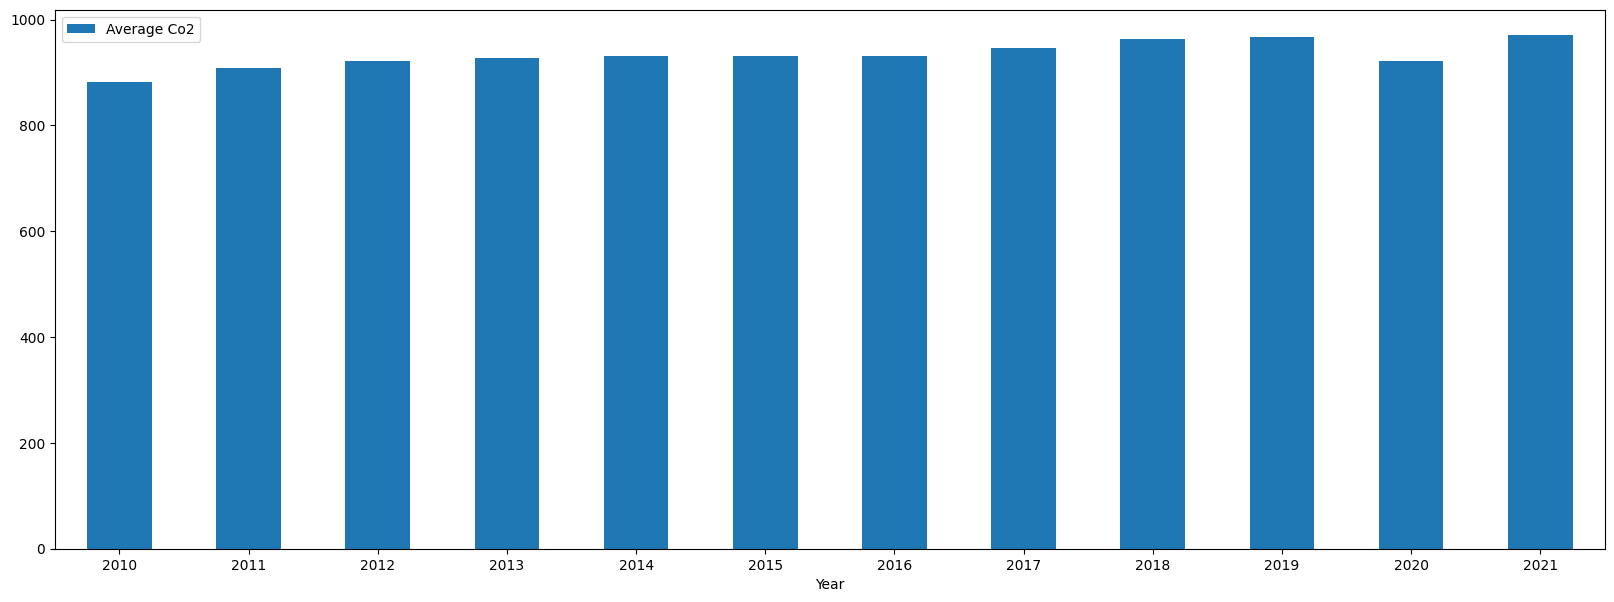

In [101]:
average_co2_df.plot(x="Year", y=["Average Co2"], kind="bar", rot=0, align="center", figsize=(20,7))

In [107]:
average_temp_2010=cleaned_data1.loc[cleaned_data1['year']==2010, 'temperature_change_from_co2'].mean()
average_temp_2011=cleaned_data1.loc[cleaned_data1['year']==2011, 'temperature_change_from_co2'].mean()
average_temp_2012=cleaned_data1.loc[cleaned_data1['year']==2012, 'temperature_change_from_co2'].mean()
average_temp_2013=cleaned_data1.loc[cleaned_data1['year']==2013, 'temperature_change_from_co2'].mean()
average_temp_2014=cleaned_data1.loc[cleaned_data1['year']==2014, 'temperature_change_from_co2'].mean()
average_temp_2015=cleaned_data1.loc[cleaned_data1['year']==2015, 'temperature_change_from_co2'].mean()
average_temp_2016=cleaned_data1.loc[cleaned_data1['year']==2016, 'temperature_change_from_co2'].mean()
average_temp_2017=cleaned_data1.loc[cleaned_data1['year']==2017, 'temperature_change_from_co2'].mean()
average_temp_2018=cleaned_data1.loc[cleaned_data1['year']==2018, 'temperature_change_from_co2'].mean()
average_temp_2019=cleaned_data1.loc[cleaned_data1['year']==2019, 'temperature_change_from_co2'].mean()
average_temp_2020=cleaned_data1.loc[cleaned_data1['year']==2020, 'temperature_change_from_co2'].mean()
average_temp_2021=cleaned_data1.loc[cleaned_data1['year']==2021, 'temperature_change_from_co2'].mean()

average_temp_data={'Year':['2010','2011','2012','2013','2014',
                           '2015','2016','2017','2018','2019','2020','2021'],
                   'Average Temp':[average_temp_2010,average_temp_2011,
                                   average_temp_2012,average_temp_2013,average_temp_2014,
                                   average_temp_2015,average_temp_2016,
                                   average_temp_2017,average_temp_2018,average_temp_2019,
                                  average_temp_2020,average_temp_2021]}
average_temp_data_df=pd.DataFrame(average_temp_data)
merge_data_co2_temp=pd.merge(average_temp_data_df,average_co2_df, on=['Year'], how='right')
merge_data_co2_temp

,Year,Average Temp,Average Co2
0,2010,0.019582,882.173653
1,2011,0.019922,908.851379
2,2012,0.020283,922.141411
3,2013,0.020619,927.754246
4,2014,0.020984,932.155234
5,2015,0.021340,932.076879
6,2016,0.021717,931.338839
7,2017,0.022057,945.561452
8,2018,0.022443,962.661738
9,2019,0.022795,967.436964


Text(0.5, 1.0, 'Comparsing of Average temperature and Co2 Emission Average')

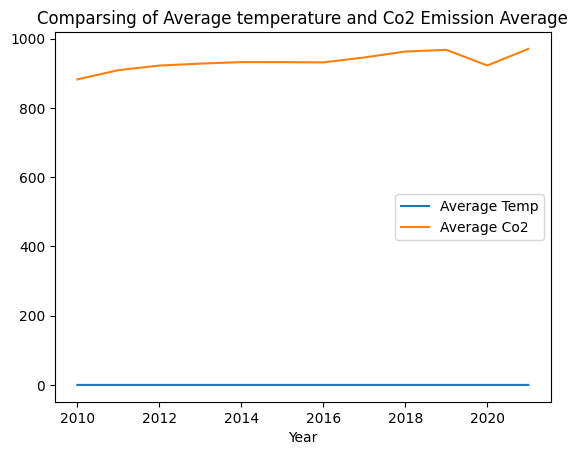

In [123]:
merge_data_co2_temp.plot(x="Year", y=["Average Temp", "Average Co2"], kind="line")
plt.title("Comparsing of Average temperature and Co2 Emission Average")

In [109]:
for col in emissionbyfactors_df.columns:
    
    print(col)

population
gdp
cement_co2
cement_co2_per_capita
co2
co2_growth_abs
co2_growth_prct
co2_including_luc
co2_including_luc_growth_abs
co2_including_luc_growth_prct
co2_including_luc_per_capita
co2_including_luc_per_gdp
co2_including_luc_per_unit_energy
co2_per_capita
co2_per_gdp
co2_per_unit_energy
coal_co2
coal_co2_per_capita
consumption_co2
consumption_co2_per_capita
consumption_co2_per_gdp
cumulative_cement_co2
cumulative_co2
cumulative_co2_including_luc
cumulative_coal_co2
cumulative_flaring_co2
cumulative_gas_co2
cumulative_luc_co2
cumulative_oil_co2
cumulative_other_co2
energy_per_capita
energy_per_gdp
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
ghg_excluding_lucf_per_capita
ghg_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
other_co2_per_capita
other_industry_co2
primary_energy_consumption
share_global_cement_co2
share_global_co2
share_global_co2_including_lu

In [110]:
cleaned_data=file_one_df1[['year','co2','population','gdp']]
df_drpna_gdp=cleaned_data.dropna()
group_by_year_co2=cleaned_data.groupby('year', as_index =False)['co2'].mean()
group_by_year_population=cleaned_data.groupby('year', as_index =False)['population'].mean()
merge_co2_population=pd.merge(group_by_year_co2,group_by_year_population, on=['year'], how="right")
df_drpna=merge_co2_population.dropna()

Text(0.5, 1.0, 'Comparsing of Population and Co2 Emission Average')

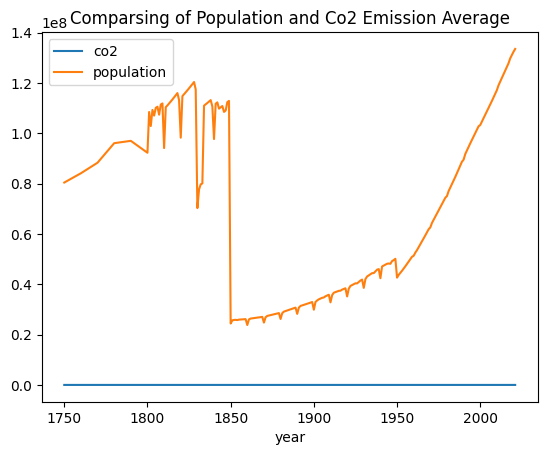

In [111]:
df_drpna.plot(x="year", y=["co2", "population"], kind="line")
plt.title("Comparsing of Population and Co2 Emission Average")

In [114]:
cleaned_data2=file_one_df1[['year','co2','temperature_change_from_ch4','temperature_change_from_co2',
                            'temperature_change_from_ghg','temperature_change_from_n2o']]
df_drpna_temp=cleaned_data2.dropna()
df_drpna_temp

,year,co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
99,1949,0.015,0.000,0.000,0.000,0.0
100,1950,0.084,0.000,0.000,0.000,0.0
101,1951,0.092,0.000,0.000,0.001,0.0
102,1952,0.092,0.000,0.000,0.001,0.0
103,1953,0.106,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...
50593,2017,9.596,0.001,0.001,0.002,0.0
50594,2018,11.795,0.001,0.001,0.002,0.0
50595,2019,11.115,0.001,0.001,0.002,0.0
50596,2020,10.608,0.001,0.001,0.002,0.0


Text(0.5, 1.0, 'Temperature changed from differnt chemicals ')

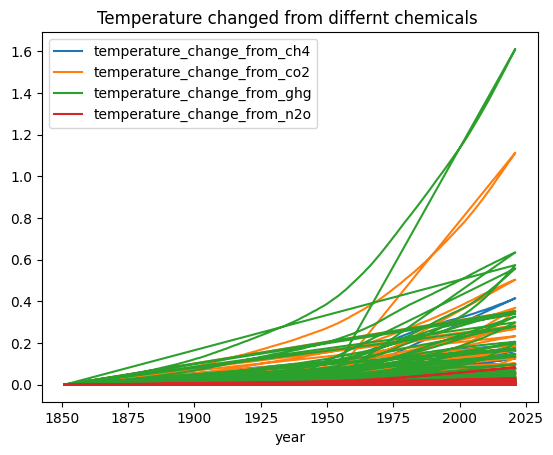

In [120]:
df_drpna_temp.plot(x="year", y=["temperature_change_from_ch4","temperature_change_from_co2",
                                "temperature_change_from_ghg","temperature_change_from_n2o"], kind="line")
plt.title("Temperature changed from differnt chemicals ")

Text(0, 0.5, 'GDP')

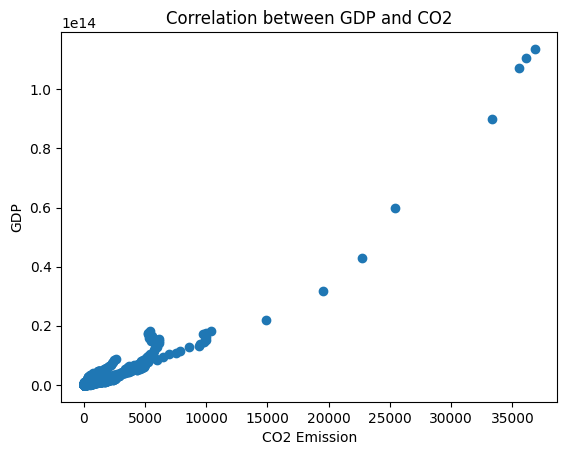

In [98]:
plt.scatter(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])
plt.title("Correlation between GDP and CO2")
plt.xlabel('CO2 Emission')
plt.ylabel('GDP')


The correlation between both factors is 0.95


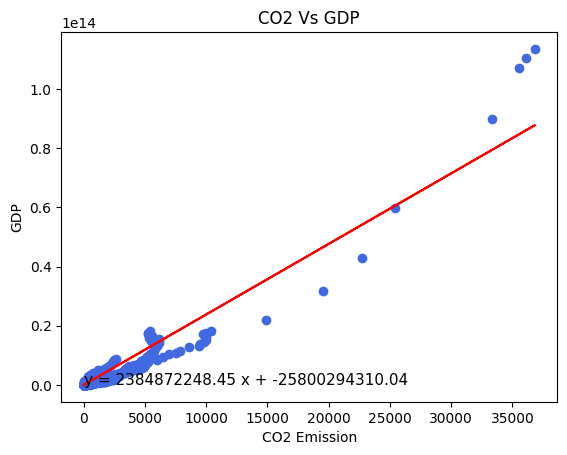

In [121]:
correlation_coefficient = st.pearsonr(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])
regress_values=df_drpna_gdp['co2']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(df_drpna_gdp['co2'], df_drpna_gdp['gdp'],color='royalblue')
plt.plot(df_drpna_gdp['co2'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("CO2 Emission")
plt.ylabel("GDP")
plt.title("CO2 Vs GDP")
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}")
plt.show()
plt.show()

Text(0, 0.5, 'Population')

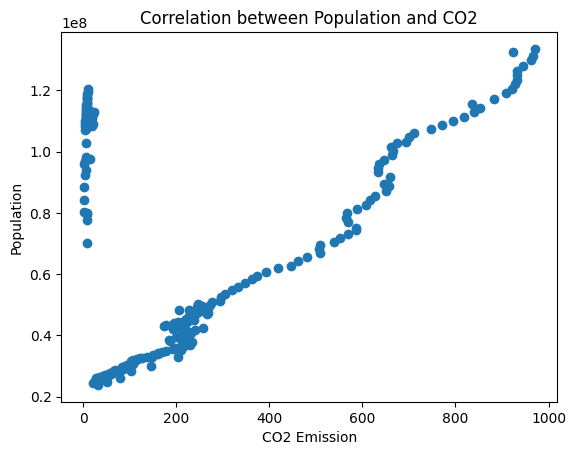

In [83]:
plt.scatter(merge_co2_population['co2'], merge_co2_population['population'])
plt.title("Correlation between Population and CO2")
plt.xlabel('CO2 Emission')
plt.ylabel('Population')


The correlation between both factors is 0.35


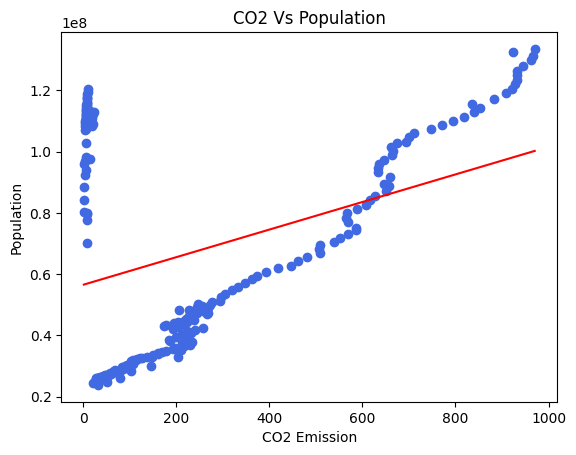

In [122]:

correlation_coefficient = st.pearsonr(df_drpna['co2'], df_drpna['population'])
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(df_drpna['co2'], df_drpna['population'])
regress_values=df_drpna['co2']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(df_drpna['co2'], df_drpna['population'],color='royalblue')
plt.plot(df_drpna['co2'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("CO2 Emission")
plt.ylabel("Population")
plt.title("CO2 Vs Population")
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}")
plt.show()

## new_data_df.plot(kind="bar", ylabel= "Average", figsize=(15, 4))